# **1. Perkenalan Dataset**
Dataset merupakan data banknote authentication yang diakses dari link berikut https://archive.ics.uci.edu/dataset/267/banknote+authentication

# **2. Import Library**

In [6]:
!pip install seaborn scikit-learn

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -----------------------------


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
# === 1. Import Library ===
import os                  
import numpy as np        
import pandas as pd       
import matplotlib.pyplot as plt 
import seaborn as sns            
from sklearn.preprocessing import StandardScaler  
from scipy import stats

# **3. Load Dataset**

In [86]:
data_path = os.path.join('..', 'Banknote-Authentication_raw', 'banknote+authentication', 'data_banknote_authentication.txt')

cols = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

data = pd.read_csv(data_path, header=None, names=cols)

data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# **4. Exploratory Data Analysis (EDA)**

## 1. Statistik Deskriptif

In [87]:
print("=== Descriptive Statistics ===")
print(data.describe())
print("\n=== Class Distribution ===")
print(data['class'].value_counts())

=== Descriptive Statistics ===
          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000

=== Class Distribution ===
class
0    762
1    610
Name: count, dtype: int64


## 2. Histogram & Distribution per Fitur

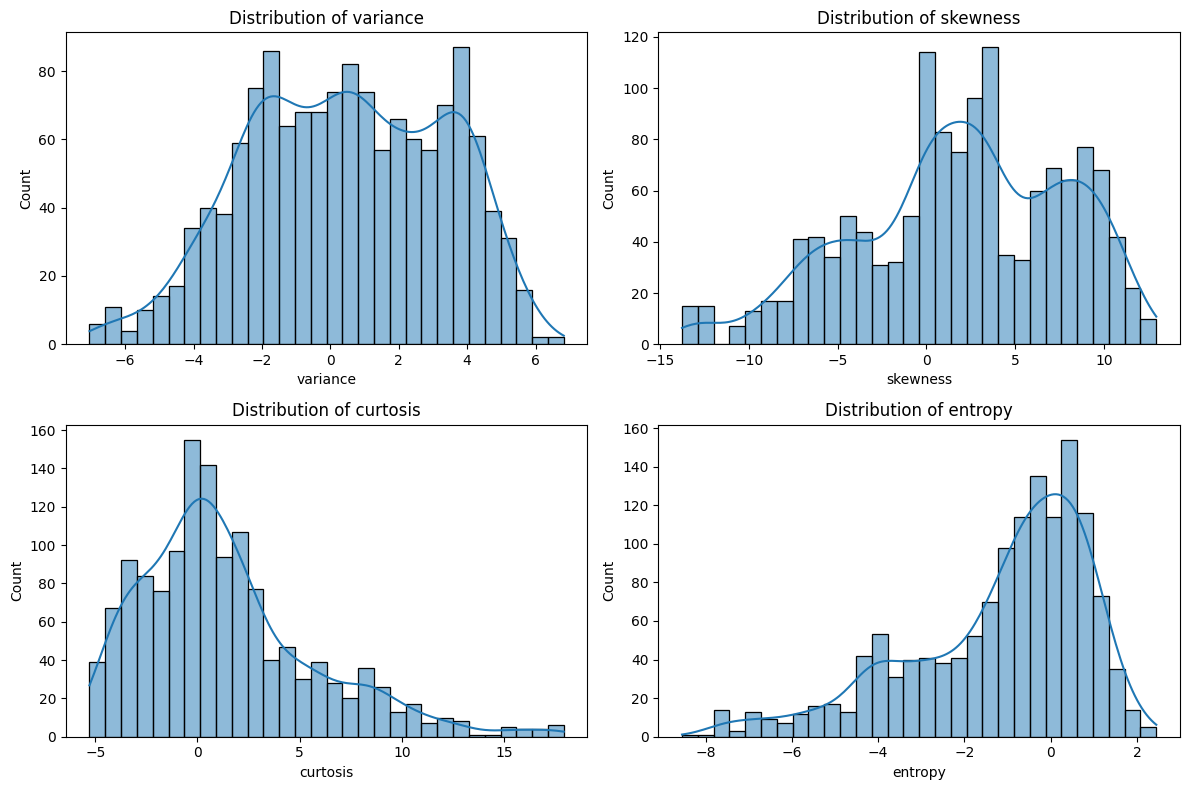

In [88]:
features = ['variance', 'skewness', 'curtosis', 'entropy']
plt.figure(figsize=(12,8))
for i, col in enumerate(features, 1):
    plt.subplot(2,2,i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## 3. Boxplot untuk Outlier Detection

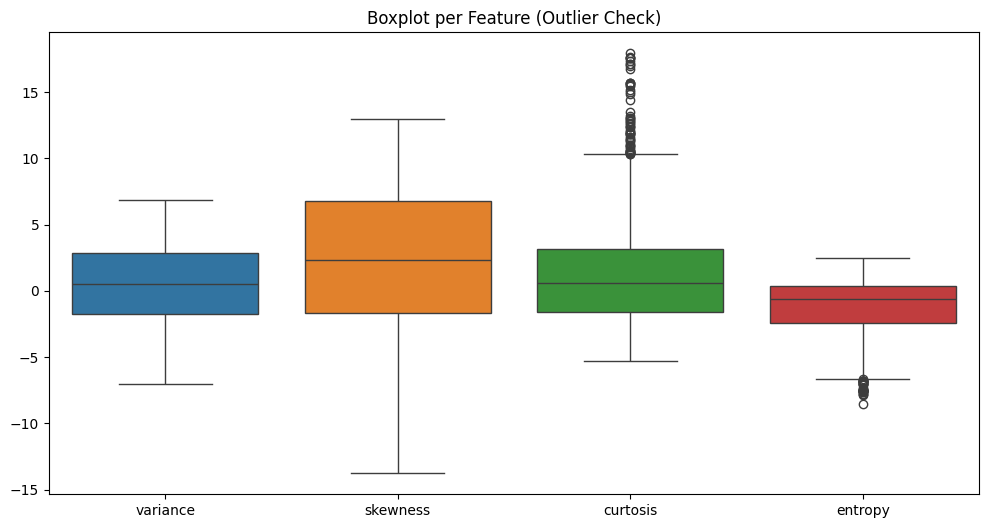

In [89]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data[features])
plt.title('Boxplot per Feature (Outlier Check)')
plt.show()

## 4. Pairplot / Scatterplot per Kelas

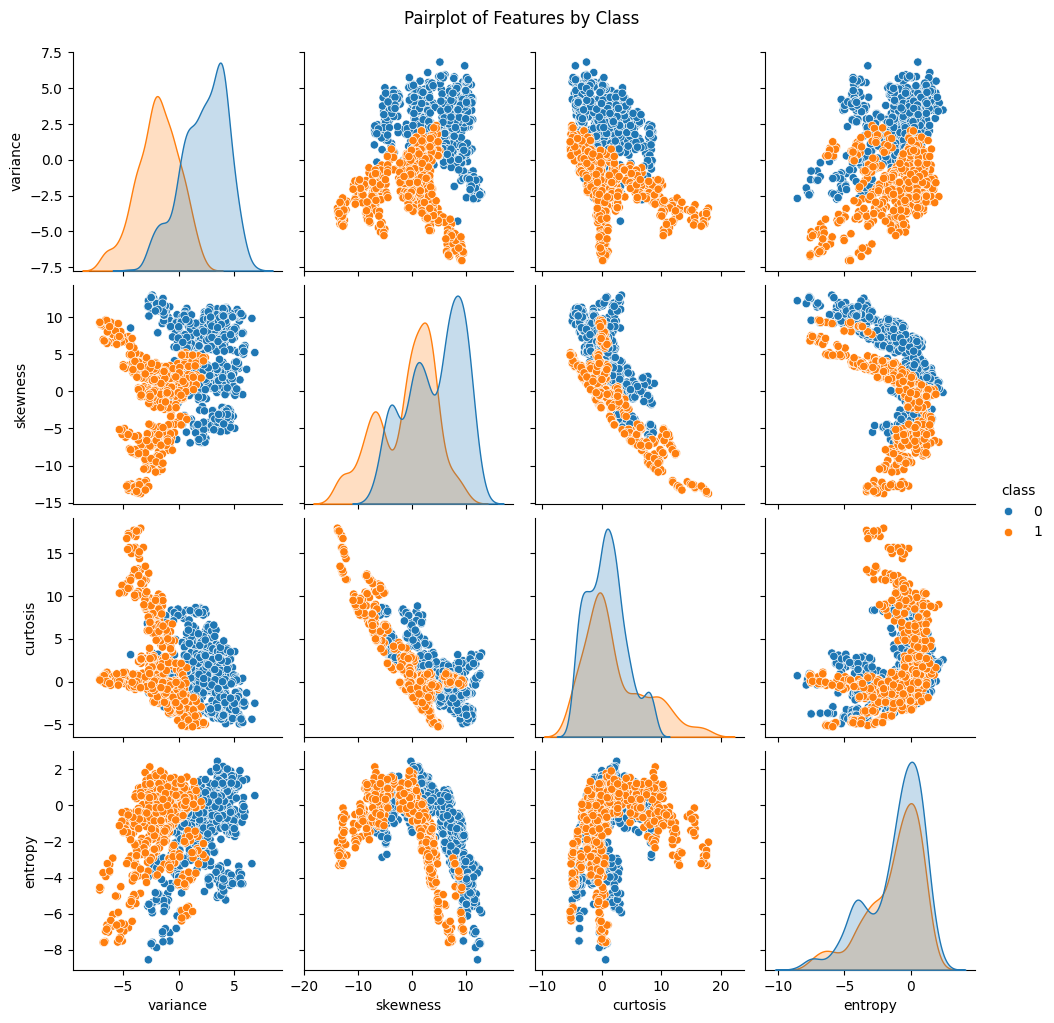

In [90]:
sns.pairplot(data, hue='class', diag_kind='kde')
plt.suptitle('Pairplot of Features by Class', y=1.02)
plt.show()

## 5. Correlation Heatmap

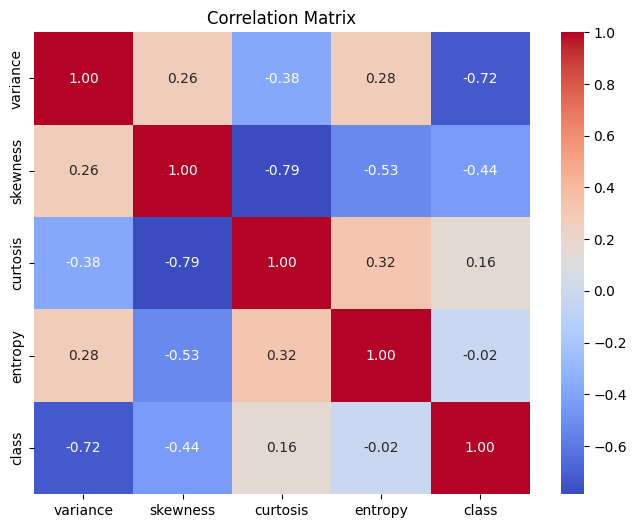

In [91]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## 6. Check Missing Values

In [92]:
print("\n=== Missing Values Check ===")
print(data.isnull().sum())


=== Missing Values Check ===
variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


## 7. Check Duplicated Rows

In [93]:
duplicate_count = data.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_count}")

if duplicate_count > 0:
    print("Duplicated rows:")
    print(data[data.duplicated()])
else:
    print("No duplicated rows found.")

Number of duplicated rows: 24
Duplicated rows:
     variance  skewness  curtosis  entropy  class
47    -0.7869    9.5663   -3.7867  -7.5034      0
139   -0.2062    9.2207   -3.7044  -6.8103      0
190    0.9297   -3.7971    4.6429  -0.2957      0
195   -1.8584    7.8860   -1.6643  -1.8384      0
226    0.5706   -0.0248    1.2421  -0.5621      0
268    0.9297   -3.7971    4.6429  -0.2957      0
284   -1.3000   10.2678   -2.9530  -5.8638      0
300    0.3292   -4.4552    4.5718  -0.9888      0
315    0.3292   -4.4552    4.5718  -0.9888      0
320    0.5195   -3.2633    3.0895  -0.9849      0
345   -1.8584    7.8860   -1.6643  -1.8384      0
351    0.5195   -3.2633    3.0895  -0.9849      0
352    0.3292   -4.4552    4.5718  -0.9888      0
404    0.3798    0.7098    0.7572  -0.4444      0
427   -1.3000   10.2678   -2.9530  -5.8638      0
436    0.3798    0.7098    0.7572  -0.4444      0
476    0.3798    0.7098    0.7572  -0.4444      0
498    0.5706   -0.0248    1.2421  -0.5621      0
604

# **Data Preprocessing**

# 1. Pisahkan fitur dan target

In [94]:
X = data.drop('class', axis=1)
y = data['class']

## 2. Hapus missing values

In [95]:
data_clean = data.dropna()

## 3. Hapus duplikasi

In [96]:
data_clean = data_clean.drop_duplicates()

## 4. Hapus outliers per fitur menggunakan IQR

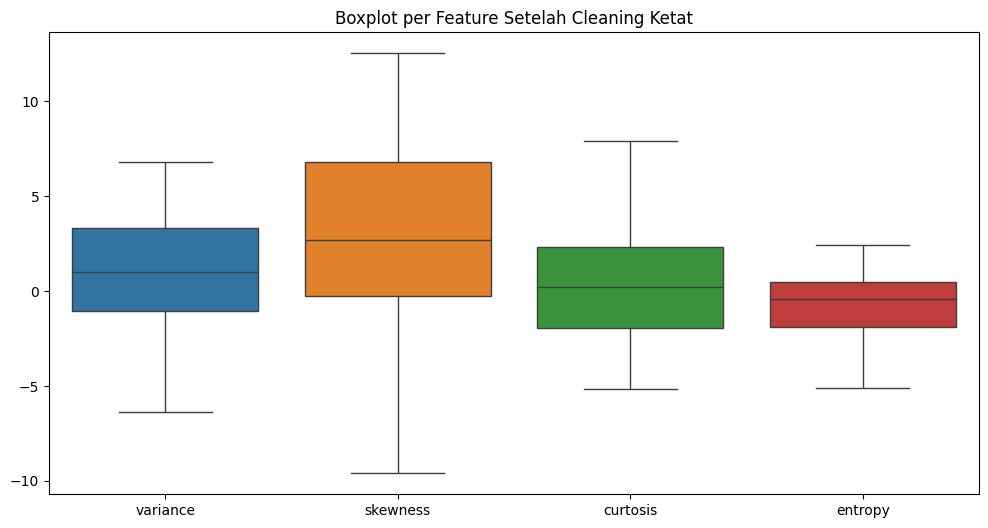

In [97]:
threshold = 1.0 
mask = ~((data_clean[features] < (Q1 - threshold * IQR)) |
         (data_clean[features] > (Q3 + threshold * IQR))).any(axis=1)
data_clean = data_clean[mask]


features = ['variance', 'skewness', 'curtosis', 'entropy']

plt.figure(figsize=(12,6))
sns.boxplot(data=data_clean[features])
plt.title('Boxplot per Feature Setelah Cleaning Ketat')
plt.show()

## 5. Normalisasi fitur

In [98]:
X_clean = data_clean[features]
y_clean = data_clean['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

data_processed = pd.DataFrame(np.column_stack((X_scaled, y_clean)), 
                              columns=features + ['class'])

## 6. Cek missing value dan data duplikat

In [99]:
print("=== Missing Values ===")
print(data_processed.isnull().sum())

print("\n=== Duplicated Rows ===")
print(data_processed.duplicated().sum())

=== Missing Values ===
variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

=== Duplicated Rows ===
0


## 7. Simpan dataset hasil preprocessing

In [101]:
output_path = 'data_banknote_preprocessing.csv'
data_processed.to_csv(output_path, index=False)
print(f"\nPreprocessed & cleaned dataset saved to: {output_path}")


Preprocessed & cleaned dataset saved to: data_banknote_preprocessing.csv
